In [1]:
!pip install osmnx geopandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 7.1 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

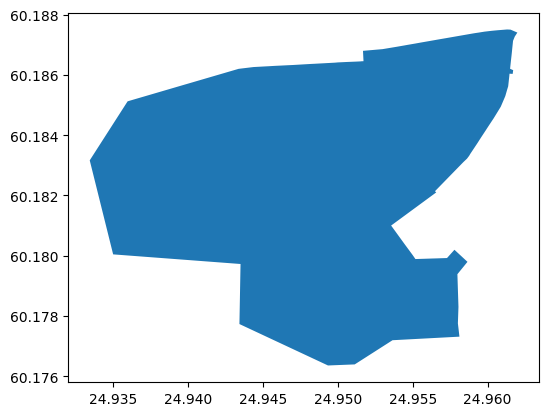

In [3]:
# Define the place
place = "Kallio, Helsinki, Finland"

# Get the GeoDataFrame for the place
gdf = ox.geocoder.geocode_to_gdf(place)

# Plot the GeoDataFrame
gdf.plot()
plt.show()

In [4]:
!pip install folium matplotlib mapclassify
gdf.explore()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.4 MB/s eta 0:00:00


In [5]:
# Assume area_gdf should be the same as gdf for this example
# You might need to adjust this based on how you intend to define the Kamppi area
area_gdf = gdf

Kallio_polygon = area_gdf.unary_union # Use unary_union instead of union_all

<ipython-input-5-acb559d539ac>:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  Kallio_polygon = area_gdf.unary_union # Use unary_union instead of union_all


In [6]:
tags = {
    "building": True,
    "highway": True,
    "railway": "station",
    "station": "subway",
    "amenity": "school"  # General schools
}
buildings_gdf = ox.features_from_polygon(
    Kallio_polygon,
    tags=tags
)

In [7]:
buildings_gdf = ox.features_from_polygon(
    Kallio_polygon,
    tags = {"building": True, "highway": True, "railway": "station", "station": "subway", "amenity": "school"}
)

In [8]:
buildings_gdf = ox.features_from_polygon(
    Kallio_polygon,
    tags = {"amenity": "school", "highway": True}
)

buildings_gdf

geometry  \
element id                                                              
node    25417099                             POINT (24.9361 60.18395)   
        25435277                            POINT (24.94402 60.18088)   
        27298501                            POINT (24.95094 60.18296)   
        36772859                            POINT (24.95042 60.17844)   
        60072320                            POINT (24.94882 60.17833)   
...                                                               ...   
way     1368104915  LINESTRING (24.95736 60.17989, 24.95733 60.179...   
        1371883866  LINESTRING (24.9495 60.17981, 24.9496 60.17982...   
        1371883867   LINESTRING (24.9495 60.17981, 24.94949 60.17992)   
        1378702479  LINESTRING (24.95737 60.17841, 24.95738 60.178...   
        1378702480  LINESTRING (24.95742 60.17811, 24.95744 60.177...   

                           crossing       highway crossing:island  \
element id                                                          
node    25417099       uncontrolled      crossing             NaN   
        25435277       uncontrolled      crossing              no   
        27298501                NaN      crossing              no   
        36772859    traffic_signals      crossing             NaN   
        60072320       uncontrolled      crossing             NaN   
...                             ...           ...             ...   
way     1368104915              NaN       footway             NaN   
        1371883866              NaN  construction             NaN   
        1371883867              NaN  unclassified             NaN   
        1378702479              NaN       footway             NaN   
        1378702480              NaN       footway             NaN   

                         created_by crossing:markings crossing:signals  \
element id                                                               
node    25417099                NaN               NaN              NaN   
        25435277                NaN               NaN              NaN   
        27298501    YahooApplet 1.0                no               no   
        36772859                NaN               NaN              NaN   
        60072320                NaN               NaN              NaN   
...                             ...               ...              ...   
way     1368104915              NaN               NaN              NaN   
        1371883866              NaN               NaN              NaN   
        1371883867              NaN               NaN              NaN   
        1378702479              NaN               NaN              NaN   
        1378702480              NaN               NaN              NaN   

                      kerb traffic_calming button_operated  ...  \
element id                                                  ...   
node    25417099       NaN             NaN             NaN  ...   
        25435277       NaN             NaN             NaN  ...   
        27298501    raised            hump             NaN  ...   
        36772859       NaN             NaN              no  ...   
        60072320       NaN           table             NaN  ...   
...                    ...             ...             ...  ...   
way     1368104915     NaN             NaN             NaN  ...   
        1371883866     NaN             NaN             NaN  ...   
        1371883867     NaN             NaN             NaN  ...   
        1378702479     NaN             NaN             NaN  ...   
        1378702480     NaN             NaN             NaN  ...   

                   parking:left:maxstay:conditional cycleway:width  \
element id                                                           
node    25417099                                NaN            NaN   
        25435277                                NaN            NaN   
        27298501                                NaN            NaN   
        36772859            

In [9]:
streets_graph = ox.graph_from_polygon(Kallio_polygon, network_type="all")
streets_gdf = ox.graph_to_gdfs(streets_graph, nodes=True)

In [10]:
buildings_gdf.plot

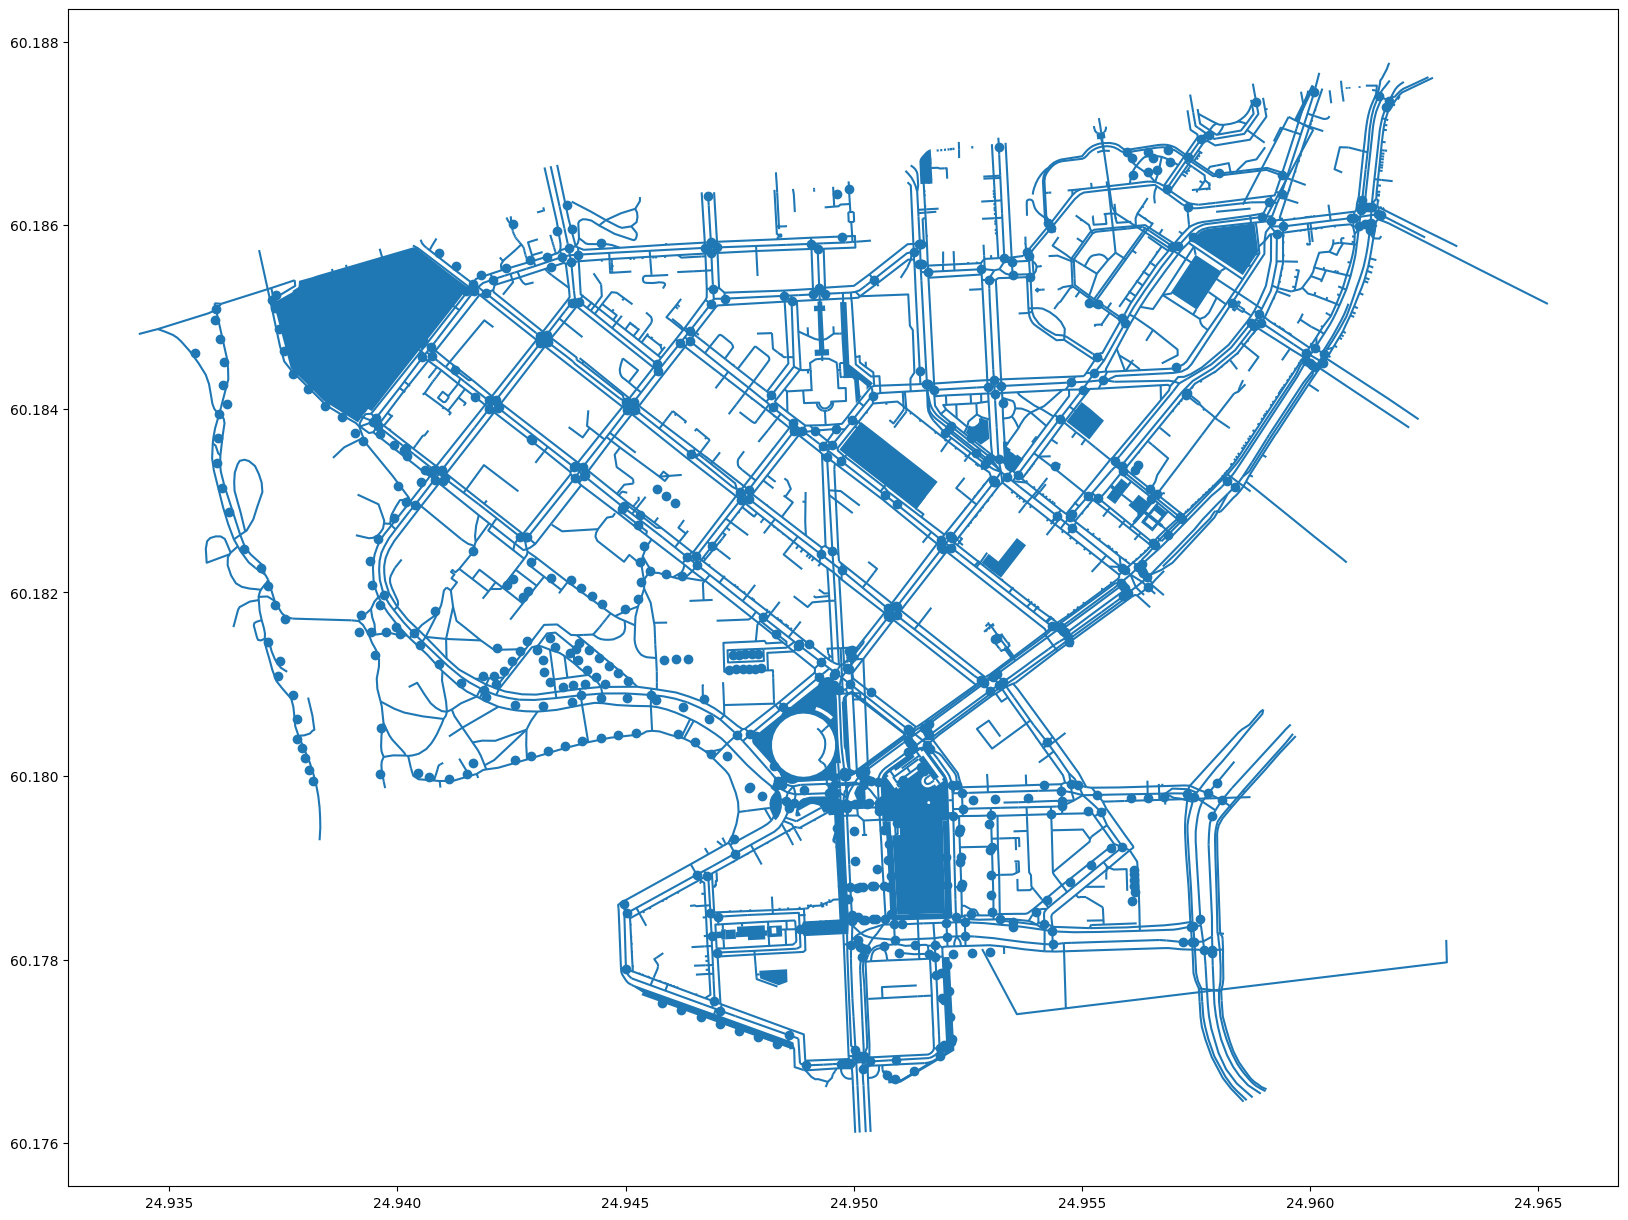

In [11]:
ax = buildings_gdf.plot(figsize=(20, 20),)

In [19]:
buildings_gdf = ox.features_from_polygon(
    Kallio_polygon,
    tags = {"building": True, "highway": True, "railway": "station", "station": "subway", "amenity": "school"}
)

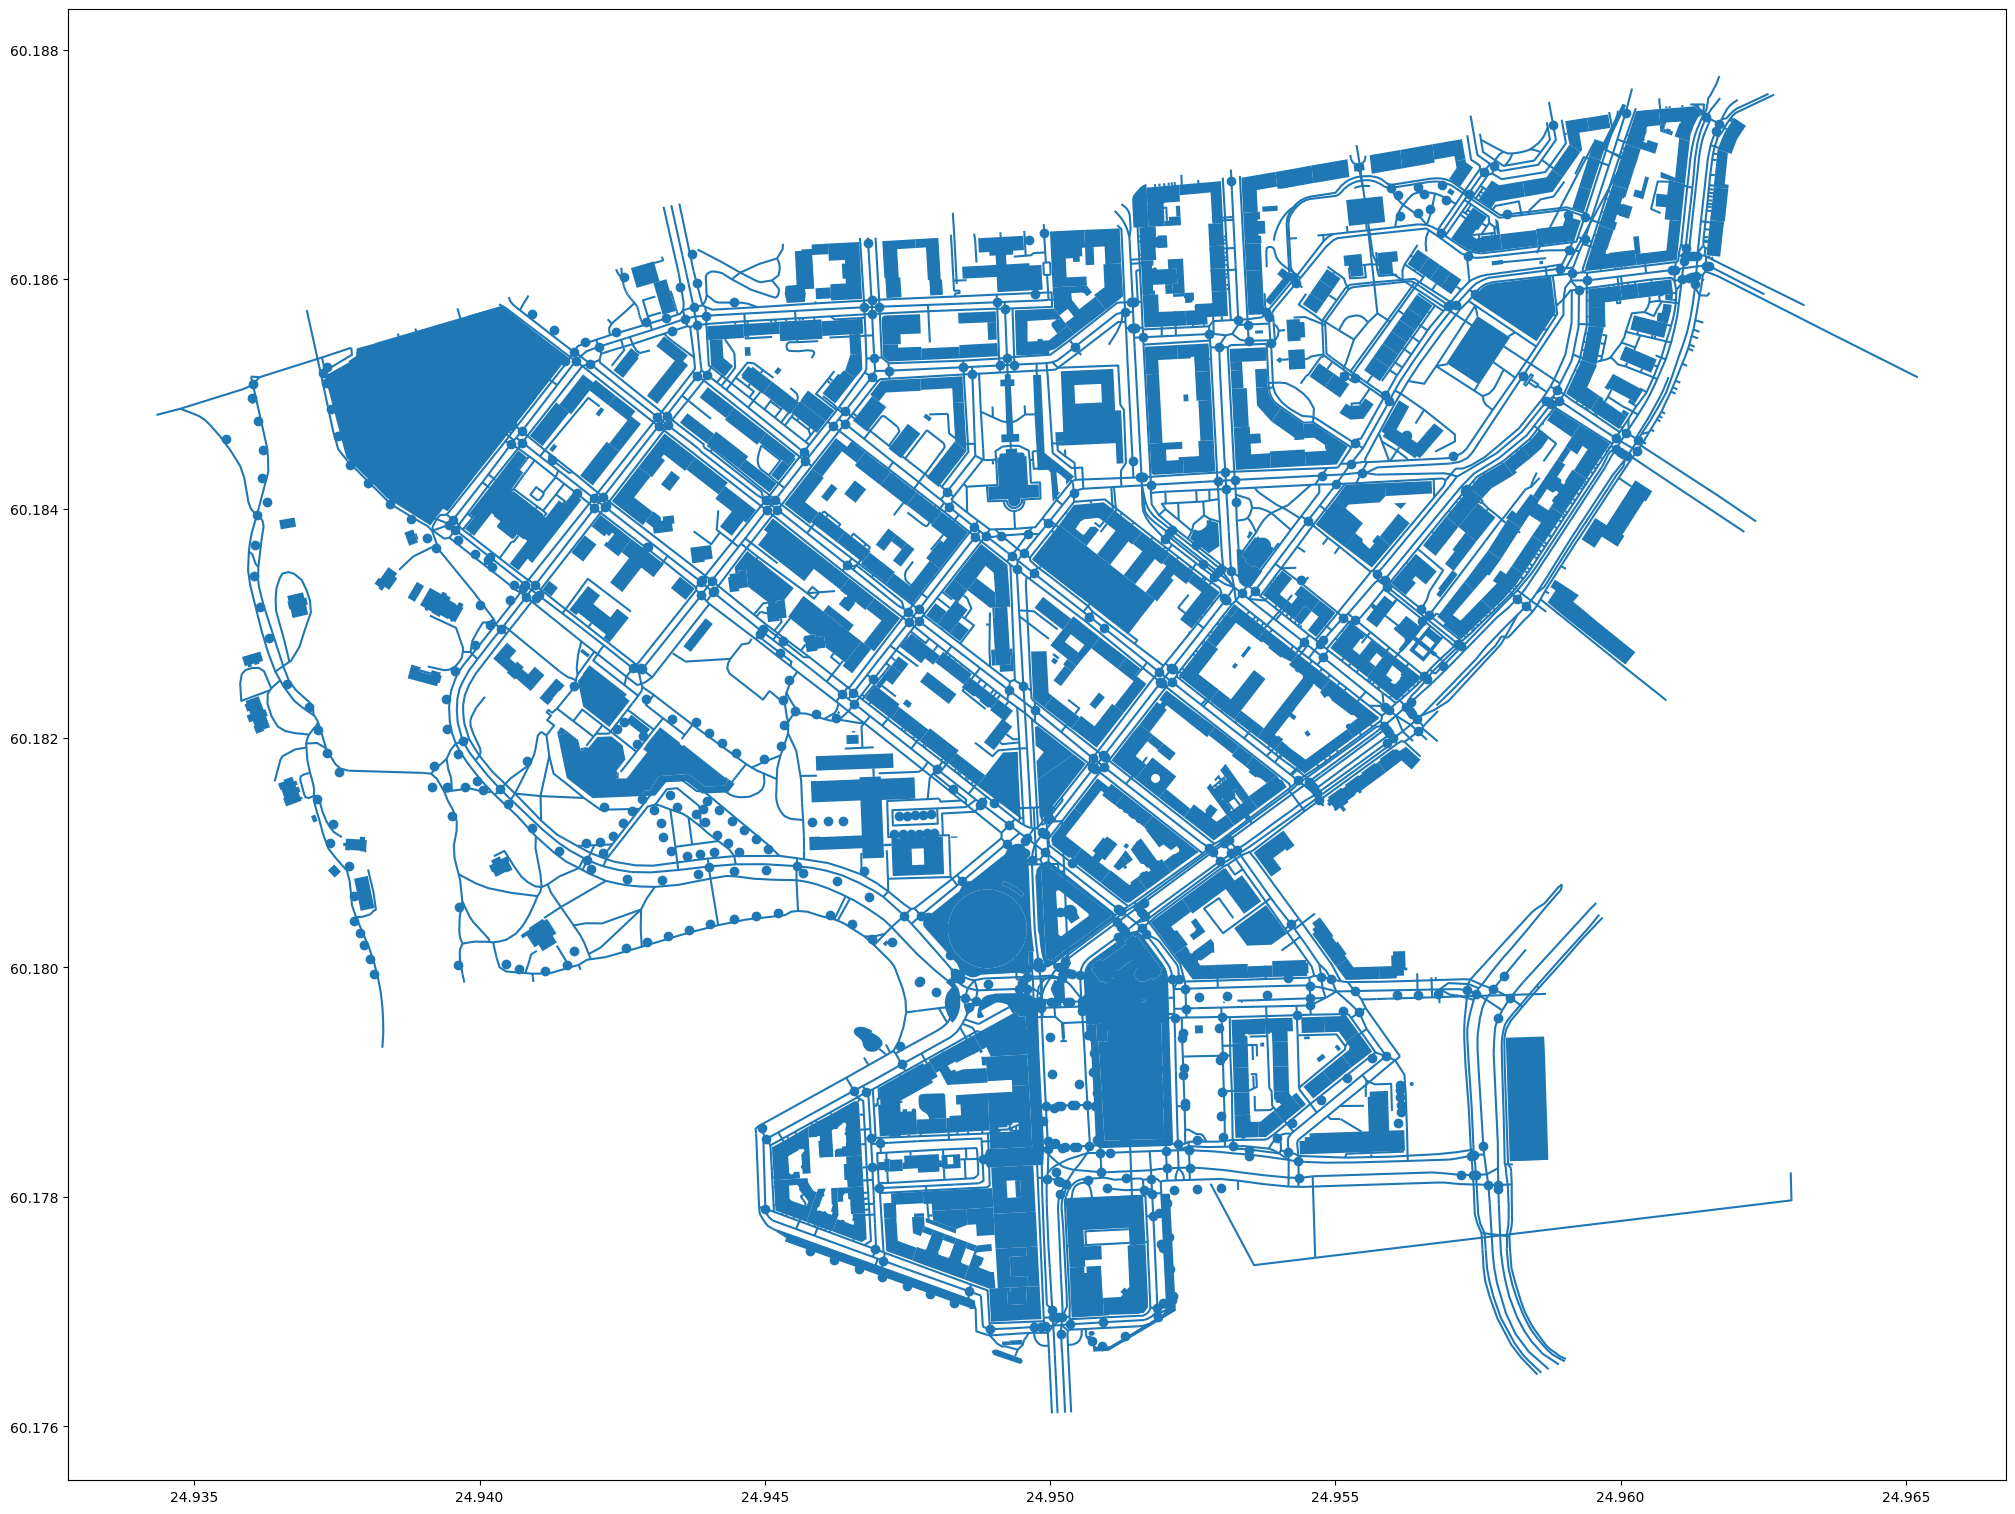

In [20]:
ax = buildings_gdf.plot(figsize=(25, 25))

In [21]:
buildings_gdf

geometry  \
element id                                                              
node    25417099                             POINT (24.9361 60.18395)   
        25435277                            POINT (24.94402 60.18088)   
        27298501                            POINT (24.95094 60.18296)   
        36772859                            POINT (24.95042 60.17844)   
        55211772                            POINT (24.95158 60.17716)   
...                                                               ...   
way     1375882370  POLYGON ((24.95007 60.18274, 24.95016 60.1827,...   
        1375882371  POLYGON ((24.95006 60.1827, 24.95014 60.18267,...   
        1375882372  POLYGON ((24.9449 60.18355, 24.94499 60.18351,...   
        1378702479  LINESTRING (24.95737 60.17841, 24.95738 60.178...   
        1378702480  LINESTRING (24.95742 60.17811, 24.95744 60.177...   

                           crossing   highway crossing:island  \
element id                                                      
node    25417099       uncontrolled  crossing             NaN   
        25435277       uncontrolled  crossing              no   
        27298501                NaN  crossing              no   
        36772859    traffic_signals  crossing             NaN   
        55211772                NaN       NaN             NaN   
...                             ...       ...             ...   
way     1375882370              NaN       NaN             NaN   
        1375882371              NaN       NaN             NaN   
        1375882372              NaN       NaN             NaN   
        1378702479              NaN   footway             NaN   
        1378702480              NaN   footway             NaN   

                         created_by crossing:markings crossing:signals  \
element id                                                               
node    25417099                NaN               NaN              NaN   
        25435277                NaN               NaN              NaN   
        27298501    YahooApplet 1.0                no               no   
        36772859                NaN               NaN              NaN   
        55211772                NaN               NaN              NaN   
...                             ...               ...              ...   
way     1375882370              NaN               NaN              NaN   
        1375882371              NaN               NaN              NaN   
        1375882372              NaN               NaN              NaN   
        1378702479              NaN               NaN              NaN   
        1378702480              NaN               NaN              NaN   

                      kerb traffic_calming button_operated  ... arcade:left  \
element id                                                  ...               
node    25417099       NaN             NaN             NaN  ...         NaN   
        25435277       NaN             NaN             NaN  ...         NaN   
        27298501    raised            hump             NaN  ...         NaN   
        36772859       NaN             NaN              no  ...         NaN   
        55211772       NaN             NaN             NaN  ...         NaN   
...                    ...             ...             ...  ...         ...   
way     1375882370     NaN             NaN             NaN  ...         NaN   
        1375882371     NaN             NaN             NaN  ...         NaN   
        1375882372     NaN             NaN             NaN  ...         NaN   
        1378702479     NaN             NaN             NaN  ...         NaN   
        1378702480     NaN             NaN             NaN  ...         NaN   

                   ramp:wheelchair check_date:ramp building:flats  \
element id                                                          
node    25417099               NaN             NaN            NaN   
        25435277               NaN             NaN            NaN  

In [22]:
buildings_gdf = ox.features_from_polygon(
    Kallio_polygon,
    tags = {"building": True, "highway": True, "railway": "station", "station": "subway", "amenity": "school"}
)

In [16]:
buildings_gdf[buildings_gdf["amenity"] == "school"].plot(ax=ax, color="red", label="Schools")

<Axes: >

In [17]:
streets_gdf = streets_gdf[1]  # if the first element is the GeoDataFrame


<ipython-input-23-059d41d2a693>:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


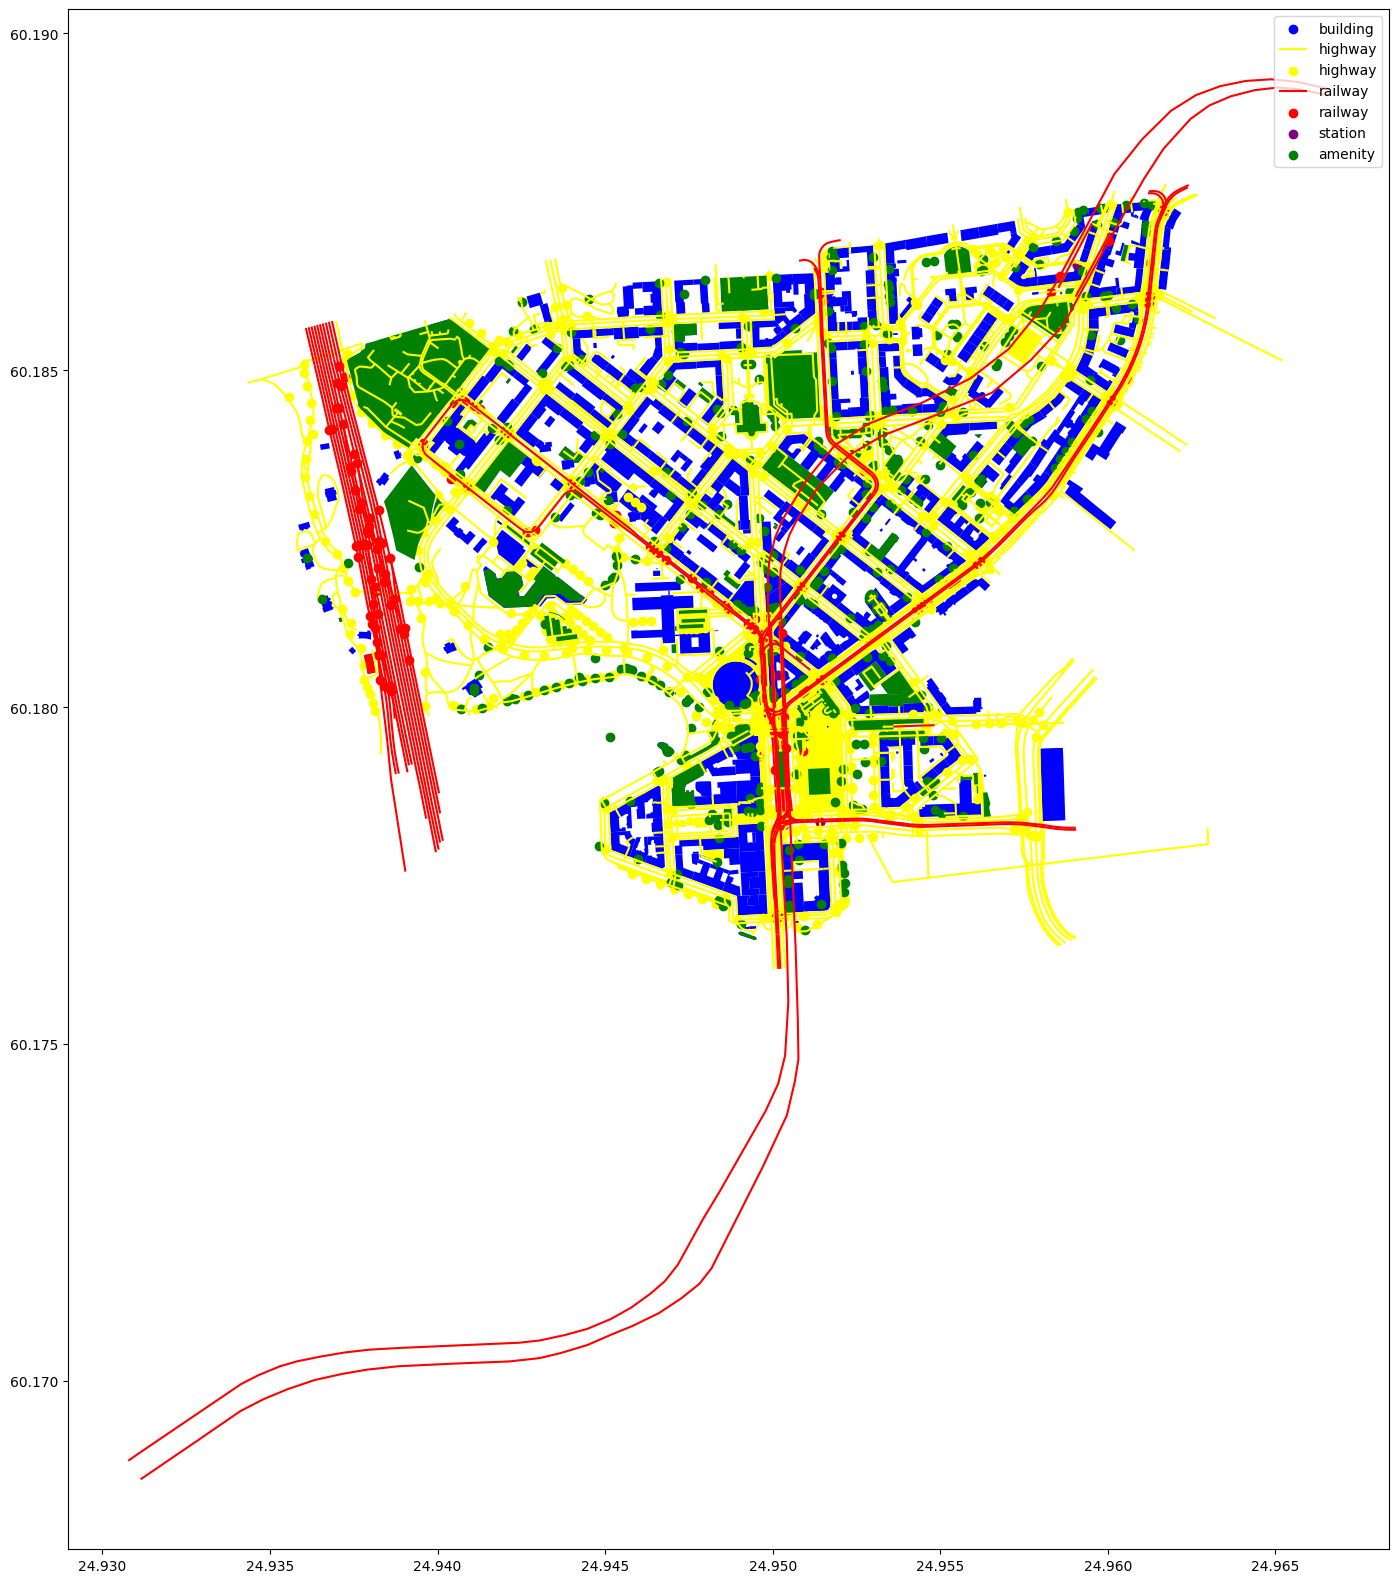

In [23]:
# prompt: make each amenity appear in a different colur. roads = green, buildings = blue, railways = red, etc

# Define tags for different amenities with specific colors
tags_with_colors = {
    "building": {"key": "building", "color": "blue"},
    "highway": {"key": "highway", "color": "yellow"},
    "railway": {"key": "railway", "color": "red"},
    "station": {"key": "station", "color": "purple"},
    "amenity": {"key": "amenity", "color": "green"}
}


fig, ax = plt.subplots(figsize=(25, 20))

# Iterate through the tags and plot each amenity type with its corresponding color
for tag_name, tag_info in tags_with_colors.items():
    amenity_gdf = ox.features_from_polygon(
        Kallio_polygon,
        tags={tag_info["key"]: True}
    )

    # Handle cases where the amenity might not exist in the area
    if not amenity_gdf.empty:
        amenity_gdf.plot(ax=ax, color=tag_info["color"], label=tag_name)

# Add legend to the plot
plt.legend()
plt.show()
